In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## 角度转弧度
def angel2arc(angel):
    return angel * np.pi / 180
def angels2arcs(angels):
    return [angel2arc(angel) for angel in angels]

# 余弦函数
def abc(theta):
    arcsheta = []
    for i in range(len(angel)):
        thisangel = angel[i]
        thisangelvalue = np.cos(angel2arc(thisangel))
        thisangelvalue =-thisangelvalue + 1
        arcsheta.append(thisangelvalue)
    return arcsheta

angelLength = 360
angel = range(0, angelLength, 1)
allvalue = abc(angel)
maxvalue = max(allvalue)
minvalue = min(allvalue)


# 一个简单的余弦曲线

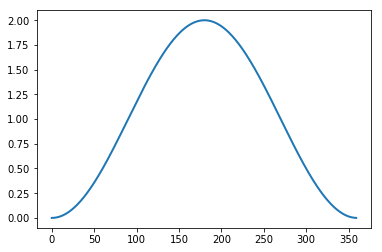

In [2]:

yy=plt.subplot(111)
yy.plot(angel,allvalue,'-',lw=2)


# 转换为极坐标系

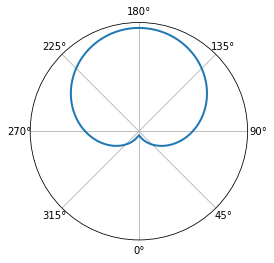

In [3]:
theta = angels2arcs(angel)
yy3=plt.subplot(111,polar=True)  
yy3.set_rscale('symlog')
yy3.plot(theta,allvalue,'-',lw=2)
yy3.set_theta_zero_location('S')

# 左侧反转，既成为太极图中的阴阳分割线（反S线）

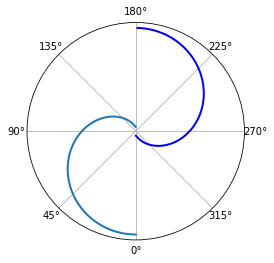

In [4]:
taijifig = plt.figure()
yy4 = taijifig.add_subplot(111,polar=True)
def revert(a):
    backdata = []
    for i in (a):
        backdata.append(allvalue[179]-i)
    return backdata
# 将前半段曲线进行反转操作
revertallvalue = allvalue[:]
revertallvalue[:180] = revert(revertallvalue[:180])

# print allvalue[0]
# yy4=plt.subplot(111,polar=True)  
yy4.plot(theta[:180],revertallvalue[:180],'-',lw=2)
yy4.plot(theta[181:360],revertallvalue[181:360],'-',lw=2,color="blue")

yy4.set_theta_zero_location('S')
yy4.set_theta_direction('clockwise')
yy4.set_rscale('symlog')





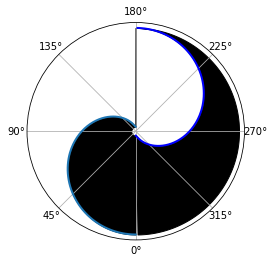

In [5]:
# yy4.plot(theta, [maxvalue for num in allvalue], '-', lw=2)

startfill = [0 for num in revertallvalue[:180]]+revertallvalue[180:360]
endfill = revertallvalue[0:181]+[maxvalue for num in revertallvalue[181:360]]



yy4.fill_between(theta, startfill, endfill,color="black")
taijifig

# 在60-90的位置加入模拟倒春寒的数据，查看阴阳失衡的情况

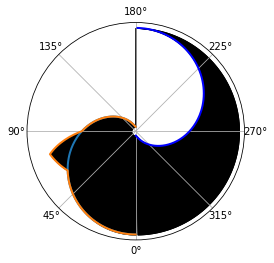

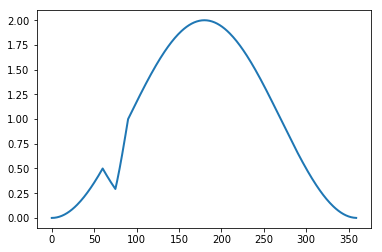

In [6]:
# 失衡数据
shihengvaluerange = range(60,90,1)
shihengvalue = [1-(np.cos(angel2arc(60 - (i - 60)))) for i in shihengvaluerange[0:15]]+[1-(np.cos(angel2arc(45 + (i - 75) * 45 / 15))) for i in shihengvaluerange[15:30]]
allvalue[60:90]=shihengvalue
shihengallvalue = revertallvalue[:]
shihengallvalue[60:90]=[2-value for value in shihengvalue]

shihengendfill = shihengallvalue[0:181]+[maxvalue for num in shihengallvalue[181:360]]
yy4.fill_between(theta, startfill, shihengendfill,color="black")
print 

yy4.plot(theta[:180],shihengallvalue[:180],'-',lw=2)
yy=plt.subplot(111)
yy.plot(angel,allvalue,'-',lw=2)
taijifig

# 太极图与十二消息卦

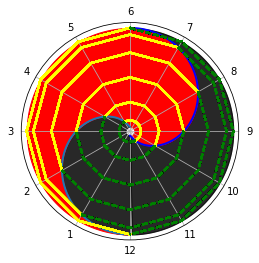

In [13]:
baguafig = plt.figure()
baguasub = baguafig.add_subplot(111,polar=True)

baguasub.set_theta_zero_location('S')
baguasub.set_theta_direction('clockwise')
baguasub.set_rscale('symlog')
baguasub.set_thetagrids((30,60,90,120,150,180,210,240,270,300,330,360),(1,2,3,4,5,6,7,8,9,10,11,12,0))
# baguasub.set_rgrids(np.arange(10,35,10),fmt='%s\u00b0')

baguasub.plot(theta[:180],revertallvalue[:180],'-',lw=2)
baguasub.plot(theta[181:360],revertallvalue[181:360],'-',lw=2,color="blue")
baguasub.fill_between(theta, startfill, endfill,color="black",alpha=0.6)

baguasub.fill_between(theta, startfill, endfill,color="black",alpha=0.6)


baguacircles = [1+np.cos(np.pi*num/6)  for num in range(6)]
# print baguacircles

for num in range(len(baguacircles)):
    baguacircles[num] = 360*[baguacircles[num]]


startfillw = revertallvalue[0:180]+[0 for num in revertallvalue[180:360]]
endfillw =  [maxvalue for num in revertallvalue[180:360]] +revertallvalue[180:360]
baguasub.fill_between(theta, startfillw, endfillw,color="red")

# for n1 in range(1):
#360个点渲染太慢，每30(jn)个点取一个点画图
jn = 30
thetaN = theta[::jn]
for n2 in range(6):
    startA = (n2)*30/jn
    endA = startA +180/jn
    baguasub.plot(thetaN[startA:endA+1],(180/jn+1)*[baguacircles[n2]],'-',lw=2,color="yellow",alpha=1)
    baguasub.plot(thetaN[endA:360/jn]+thetaN[0:startA+1],(180/jn+1)*[baguacircles[n2]],'--',lw=2,color="green",alpha=1)

baguasub



<img src="http://d.hiphotos.baidu.com/baike/w%3D268%3Bg%3D0/sign=937c3a8bc3fdfc03e578e4beec04e0a9/242dd42a2834349b58bba2f0c9ea15ce36d3be02.jpg"
style="width:300px;height:300px;float:left">